In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Information about the dataset:

The NASA Exoplanet Archive is a database that contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources.

In [37]:
exoplanets = pd.read_csv("cleaned_5250.csv", index_col=["name"])
exoplanets.head()

,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
name,,,,,,,,,,,,
11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


Let's look at some values and learn about the dataset. 

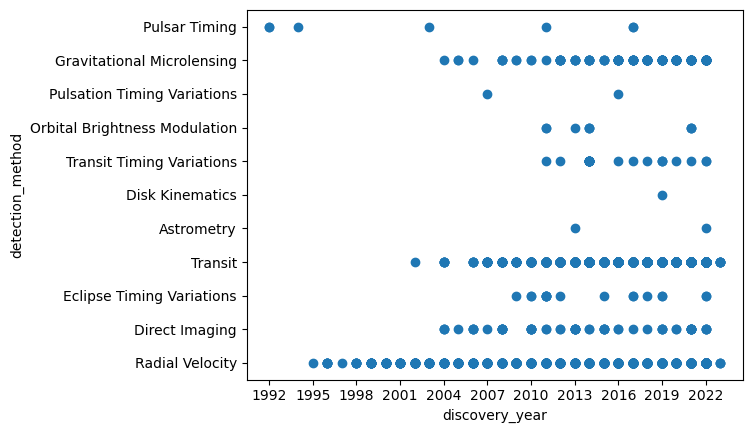

In [19]:
plt.scatter(exoplanets["discovery_year"], exoplanets['detection_method'])
plt.xlabel('discovery_year')
plt.xticks(range(1992, 2023, 3))
plt.ylabel('detection_method')
plt.show()

Now let's look at in which year did we explore the most exoplanet.

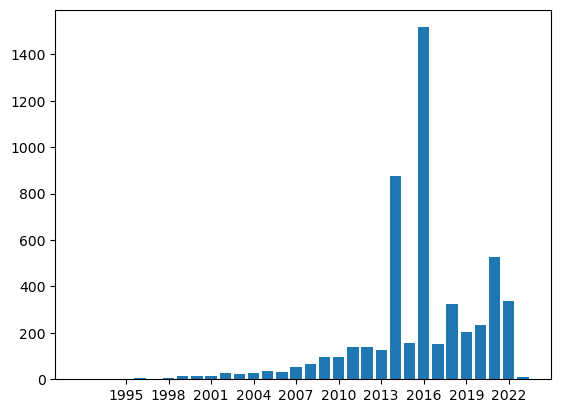

In [41]:
exoplanets["year"] = exoplanets["discovery_year"].astype(int)
grouped = exoplanets.groupby("year")["name"].count()
plt.bar(grouped.index, grouped.values)
plt.xticks(range(1995,2023, 3))
plt.show()

The majority of the exoplanets that were discovered in 2016 were found by Kepler. In fact, 2016 was the year that Kepler announced its largest batch of exoplanet discoveries, with over 700 new planets being found. These discoveries helped to further our understanding of exoplanets and the universe as a whole.

We can compare some values and review their connection with correlation coefficient. The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. It is a number between -1 and 1.

Here is the equation:

r = (∑(x - x̄)(y - ȳ)) / √(∑(x - x̄)^2)√(∑(y - ȳ)^2)

But we can make use of Pandas to do the math for us.

In [4]:
brightness_year = exoplanets[["stellar_magnitude", "discovery_year"]]
brightness_year

,stellar_magnitude,discovery_year
name,,
11 Comae Berenices b,4.72307,2007
11 Ursae Minoris b,5.01300,2009
14 Andromedae b,5.23133,2008
14 Herculis b,6.61935,2002
16 Cygni B b,6.21500,1996
...,...,...
XO-7 b,10.52100,2019
YSES 2 b,10.88500,2021
YZ Ceti b,12.07400,2017


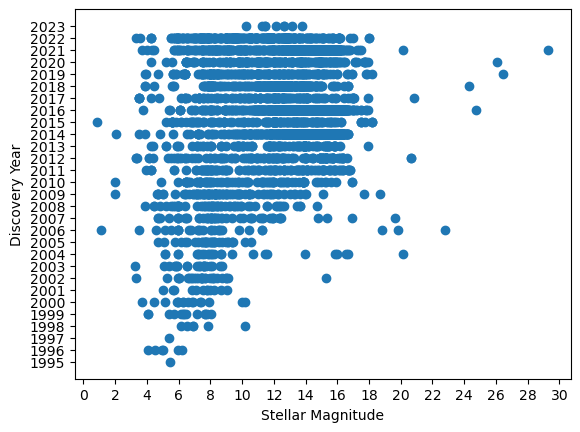

In [42]:
exoplanets_under_30 = exoplanets.query("stellar_magnitude < 30")

plt.scatter(exoplanets_under_30['stellar_magnitude'].values, exoplanets_under_30['discovery_year'].values)
plt.xlabel('Stellar Magnitude')
plt.ylabel('Discovery Year')
plt.yticks(range(1995, 2024, 1))
plt.xticks(range(0, 31, 2))
plt.show()

In [16]:
correlation_coefficient = exoplanets["discovery_year"].corr(exoplanets["stellar_magnitude"])
correlation_coefficient

0.21800990617460148

A correlation coefficient of 0.21 indicates a weak positive correlation between two variables. This means that as one variable increases, the other variable is likely to increase, but the relationship is not very strong. We can see a weak connection from the graph as well.

Let's look at some other variables:

In [17]:
brightness_distance = exoplanets[["stellar_magnitude", "distance"]]
brightness_distance

,stellar_magnitude,distance
name,,
11 Comae Berenices b,4.72307,304.0
11 Ursae Minoris b,5.01300,409.0
14 Andromedae b,5.23133,246.0
14 Herculis b,6.61935,58.0
16 Cygni B b,6.21500,69.0
...,...,...
XO-7 b,10.52100,764.0
YSES 2 b,10.88500,357.0
YZ Ceti b,12.07400,12.0


In [18]:
correlation_coefficient1 = exoplanets["distance"].corr(exoplanets["stellar_magnitude"])
correlation_coefficient1

0.6145418442403302

As expected, our value is higher. A correlation coefficient of 0.61 indicates a moderate positive correlation between two variables. This means that as one variable increases, the other variable is likely to increase, and the relationship is somewhat strong. Because there are other factors that influence one another, a higher value is not expected.